In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = r"https://raw.githubusercontent.com/nahdarantung/Thesis/refs/heads/main/All%20Data%20with%20MnO2%20pour%20density%20and%20surface%20area%20(paper).csv"
df = pd.read_csv(path)

X = df.drop(columns=['Max Current', 'Capacity'])
y = df['Max Current']

df = pd.concat([X, y], axis=1)

from pycaret.regression import *

exp = setup(data = df, target = 'Max Current', session_id=123, verbose=False)
model = compare_models(exclude=['catboost'])
evaluate_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.6434,1.4033,0.8835,0.9302,0.1414,0.1684,0.0130
llar,Lasso Least Angle Regression,1.5514,5.2443,1.9280,0.5501,0.3327,0.5858,0.0040
lasso,Lasso Regression,1.5515,5.2449,1.9282,0.5499,0.3328,0.5858,0.2790
en,Elastic Net,1.6069,5.6552,1.9891,0.4858,0.3454,0.6124,0.0050
ada,AdaBoost Regressor,1.3394,3.3404,1.6642,0.4671,0.2501,0.3292,0.0090
br,Bayesian Ridge,1.7059,6.6305,2.1198,0.3571,0.3673,0.6676,0.0050
huber,Huber Regressor,1.6818,6.3621,2.1275,0.3560,0.3343,0.6362,0.0050
ridge,Ridge Regression,1.7461,6.9714,2.1745,0.3366,0.3575,0.6745,0.0050
rf,Random Forest Regressor,1.4528,4.6524,1.8703,0.2204,0.2875,0.3690,0.0160
gbr,Gradient Boosting Regressor,1.4109,4.0921,1.8139,0.2091,0.2582,0.3407,0.0080


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_cleaned = df.dropna()

X = df_cleaned.drop(columns=['Max Current'])
y = df_cleaned['Max Current']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

df_train_combined = pd.DataFrame(X_train, columns=X.columns)
df_train_combined['Max Current'] = y_train.values

df_test_combined = pd.DataFrame(X_test, columns=X.columns)
df_test_combined['Max Current'] = y_test.values

exp = setup(data = df_train_combined, target = 'Max Current', session_id=123, verbose=False)
model = compare_models(exclude=['catboost'])
evaluate_model(model)

X_train shape: (46, 12), X_test shape: (12, 12)
y_train shape: (46,), y_test shape: (12,)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.8296,1.9717,1.0480,0.9080,0.1326,0.1430,0.0140
ridge,Ridge Regression,1.4141,4.0402,1.7424,0.7083,0.2672,0.3252,0.0040
br,Bayesian Ridge,1.4208,4.0516,1.7479,0.7035,0.2667,0.3285,0.0050
lasso,Lasso Regression,1.6493,5.5420,2.0006,0.6779,0.2573,0.2965,0.0040
llar,Lasso Least Angle Regression,1.6493,5.5420,2.0006,0.6779,0.2573,0.2965,0.0050
ada,AdaBoost Regressor,1.3967,4.3389,1.7769,0.6687,0.2509,0.2828,0.0090
gbr,Gradient Boosting Regressor,1.4368,4.4728,1.8154,0.6068,0.2275,0.2703,0.0070
knn,K Neighbors Regressor,1.4555,4.4091,1.7449,0.5644,0.2561,0.3337,0.0060
en,Elastic Net,1.8137,6.6611,2.1630,0.5496,0.2730,0.3391,0.0050
rf,Random Forest Regressor,1.5499,5.3769,2.0278,0.5107,0.2760,0.3188,0.0160


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.9716,1.6289,1.2763,0.9471,0.3639,0.6982


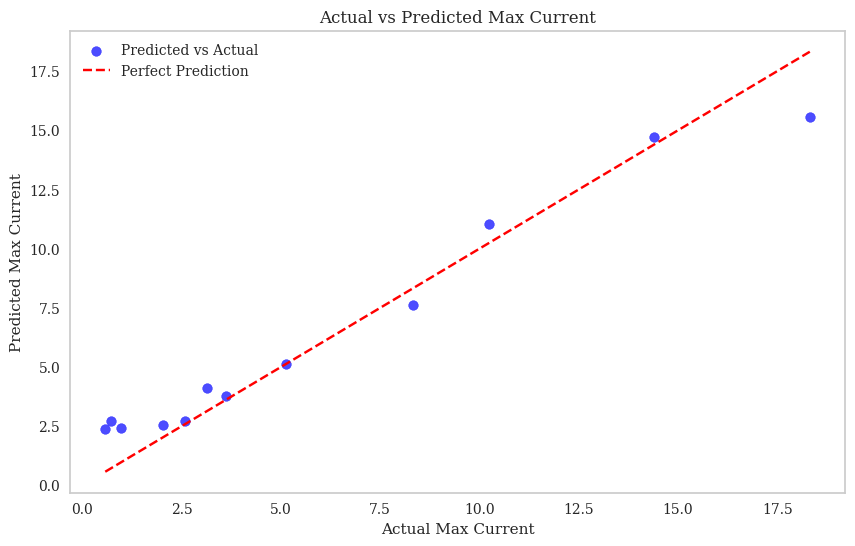

In [36]:
y_pred = predict_model(model, data=df_test_combined)
df_test_combined['Predicted Max Current'] = y_pred['prediction_label']

plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 12, 'font.family': 'serif'})
plt.scatter(df_test_combined['Max Current'], df_test_combined['Predicted Max Current'], color='blue', alpha=0.7, label='Predicted vs Actual')
plt.plot([df_test_combined['Max Current'].min(), df_test_combined['Max Current'].max()],
         [df_test_combined['Max Current'].min(), df_test_combined['Max Current'].max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Max Current')
plt.ylabel('Predicted Max Current')
plt.title('Actual vs Predicted Max Current')
plt.legend()
plt.grid(False)
plt.show()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.1699,0.1527,0.3908,0.9935,0.1261,0.0935


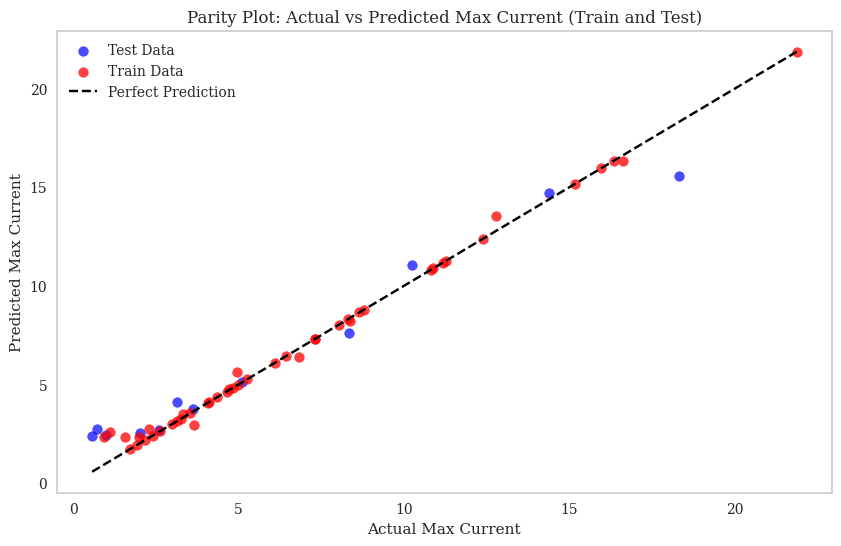

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(df_test_combined['Max Current'], df_test_combined['Predicted Max Current'], color='blue', alpha=0.7, label='Test Data')
plt.scatter(df_train_combined['Max Current'], predict_model(model, data=df_train_combined)['prediction_label'], color='red', alpha=0.75, label='Train Data')
plt.plot([min(df_test_combined['Max Current'].min(), df_train_combined['Max Current'].min()), 
          max(df_test_combined['Max Current'].max(), df_train_combined['Max Current'].max())],
         [min(df_test_combined['Max Current'].min(), df_train_combined['Max Current'].min()), 
          max(df_test_combined['Max Current'].max(), df_train_combined['Max Current'].max())],
         color='black', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Max Current')
plt.ylabel('Predicted Max Current')
plt.title('Parity Plot: Actual vs Predicted Max Current (Train and Test)')
plt.legend()
plt.grid(False)
plt.show()

In [38]:
df_test_combined

,AC,CB,G,MnO2,Pour Density,Surface Area,Dry Conductivity,Electrolyte Uptake,Water Uptake,Voltage Drop,Cell Resistance,Wet Conductivity,Max Current,Predicted Max Current
0,2.610464,-1.388022,-1.225312,-1.378405,-0.596576,2.466945,-0.929020,3.166763,3.203333,2.663380,2.404769,-1.057577,0.730000,2.725684
1,1.478122,-0.271784,-1.225312,-1.378405,-0.769130,1.345278,-0.456136,0.816350,1.417814,-0.031461,-0.128716,-0.575145,2.588088,2.709315
2,-0.560093,-0.197369,0.774807,0.725476,0.404705,-0.493911,-0.172854,-0.651198,-0.540323,-0.612869,-0.478753,0.778218,10.246029,11.055062
3,-1.164008,-1.388022,2.621071,-1.378405,-2.158231,-1.321795,0.068626,-0.575281,-0.386474,1.977233,1.500123,-0.997537,0.980588,2.434382
4,0.874207,-1.201982,0.351705,0.725476,0.731787,0.932351,-0.852528,1.728019,-0.077880,0.389168,0.006795,-0.945776,3.131912,4.113572
5,-0.937540,-1.127566,2.121041,0.725476,0.001922,-0.885248,-0.199013,-0.086277,-0.652918,-0.457658,-0.369398,-0.549740,8.335441,7.607506
6,-1.164008,1.216532,-0.071397,-1.378405,-1.467700,-1.286900,3.300612,-1.842501,-1.851670,0.101960,-0.144777,-0.517016,2.030000,2.550779
7,-1.164008,-0.271784,1.467156,0.725476,0.135111,-1.101107,0.509760,-0.415857,-1.252705,-0.741230,-0.504345,1.473521,14.387255,14.702779
8,0.723228,-0.197369,-0.532963,0.725476,0.935668,0.794260,-0.734003,0.689403,-0.380941,-0.185204,-0.307022,-0.663031,5.121029,5.128678
9,1.289399,-0.271784,-1.032992,0.725476,1.150187,1.361574,-0.890176,1.043302,-0.031574,0.150048,-0.195018,-0.844392,3.625147,3.777896
